In [1]:
pip install faker

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from faker import Faker
import random

In [2]:
fake = Faker()

In [3]:
Categories = ["Rent", "Groceries", "Transportation", "Dining Out", "Entertainment","Health Care", "Insurance", 
              "Clothing", "Education" ]
Payment_modes = ["UPI", "Cash", "ATM Card"]

In [4]:
expense = {
    "Date": fake.date_this_month(),
    "Categories" : random.choice(Categories),
    "Payment mode" : random.choice(Payment_modes),
    "Description" : fake.sentence(),
    "Amount" : round(random.uniform(10,1000),2)
}
print(expense)

{'Date': datetime.date(2025, 3, 3), 'Categories': 'Dining Out', 'Payment mode': 'ATM Card', 'Description': 'Human that main newspaper local manage.', 'Amount': 589.8}


In [5]:
import pandas as pd
from datetime import datetime

In [6]:
def generate_monthly_expenses(num_expenses):
    expenses = []
    for month in range(1,13):
        for i in range(num_expenses):
            expenditure = {
               "Date": fake.date_between_dates(
                        date_start=datetime.strptime(f"{2025}-{month:02d}-01", "%Y-%m-%d").date(),  # Start of the month
                        date_end=datetime.strptime(f"{2025}-{month:02d}-28", "%Y-%m-%d").date()),   # End of the month (28th to keep it simple)
               "Categories" : random.choice(Categories),
               "Payment_mode" : random.choice(Payment_modes),
               "Description" : fake.sentence(),
               "Amount" : round(random.uniform(10,1000),2)
            }  
            expenses.append(expenditure)
    return pd.DataFrame(expenses)
    

           
            

In [7]:
one_year_expense = generate_monthly_expenses(5)

In [8]:
one_year_expense

,Date,Categories,Payment_mode,Description,Amount
0,2025-01-03,Insurance,UPI,Live power move public top large never particu...,454.15
1,2025-01-06,Groceries,ATM Card,Operation figure often whose off future.,670.89
2,2025-01-15,Transportation,UPI,Employee just despite put second finally as re...,662.06
3,2025-01-08,Dining Out,ATM Card,Budget evening of lay dog.,193.37
4,2025-01-22,Clothing,Cash,Quite tax before start red.,826.24
5,2025-02-10,Dining Out,UPI,Meet coach one single.,764.42
6,2025-02-03,Clothing,ATM Card,Than world great role fine surface prove.,256.74
7,2025-02-24,Insurance,UPI,No thank leader question respond.,508.63
8,2025-02-04,Insurance,UPI,Same white structure investment care rate.,821.51
9,2025-02-17,Transportation,UPI,Ready college stop number wait.,768.60


In [9]:
## Integrate sqlite with python

In [10]:
import sqlite3

In [11]:
connection = sqlite3.connect("db_name")
cursor = connection.cursor()

In [12]:
def create_sqlite_db(one_year_expense, db_name ="expenses.db"):
    # Create a connection to SQLite (this will create the database file if it doesn't exist)
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()

In [13]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS monthly_expenses (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Date TEXT,
        Categories TEXT,
        Payment_mode TEXT,
        Description TEXT,
        Amount REAL
    )
''')

In [14]:
 for index, row in one_year_expense.iterrows():
        cursor.execute('''
        INSERT INTO monthly_expenses (Date, Categories, Payment_mode, Description, Amount)
        VALUES (?, ?, ?, ?, ?)
        ''', (row['Date'], row['Categories'], row['Payment_mode'], row['Description'], row['Amount']))

 connection.commit()  # Commit the changes to the databasw
    

C:\Users\Mridul Tiwari\AppData\Local\Temp\ipykernel_8516\1687311702.py:2: DeprecationWarning: The default date adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  cursor.execute('''


In [15]:
one_year_expense = generate_monthly_expenses(5)

In [16]:
create_sqlite_db(one_year_expense)

In [17]:
print("Database connection established:", connection)

Database connection established: <sqlite3.Connection object at 0x000001A51672F6A0>


In [18]:
## Perform different queries
cursor.execute("SELECT * FROM monthly_expenses LIMIT 5")
data = cursor.fetchall()

In [19]:
for row in data:
    print(row)

(1, '2025-01-12', 'Clothing', 'ATM Card', 'Might away world can cause cell.', 209.6)
(2, '2025-01-10', 'Education', 'UPI', 'Article explain deep southern age.', 916.36)
(3, '2025-01-12', 'Entertainment', 'ATM Card', 'Manager avoid accept particular red.', 513.38)
(4, '2025-01-04', 'Entertainment', 'UPI', 'Happy that impact although partner side little.', 929.5)
(5, '2025-01-11', 'Dining Out', 'ATM Card', 'Natural sister think choose hit cultural likely.', 99.9)


In [20]:
cursor.execute("SELECT * FROM monthly_expenses WHERE Categories = 'Groceries'")
groceries_data = cursor.fetchall()

# Print the first 5 rows of filtered data
for row in groceries_data[:5]:
    print(row)

(12, '2025-03-23', 'Groceries', 'Cash', 'Degree source traditional few describe other TV.', 193.44)
(17, '2025-04-23', 'Groceries', 'ATM Card', 'Cultural stuff decide fine economic gun consumer.', 129.02)
(18, '2025-04-09', 'Groceries', 'UPI', 'Pm amount any current catch scene history.', 34.16)
(33, '2025-07-08', 'Groceries', 'ATM Card', 'Mean single medical bank.', 826.11)
(44, '2025-09-26', 'Groceries', 'ATM Card', 'Country total more despite soon.', 526.72)


In [21]:
cursor.execute("SELECT COUNT(*) FROM monthly_expenses")
count = cursor.fetchone()
print(f"Total number of records: {count[0]}")


Total number of records: 300


In [22]:
# Sum the Amounts for each Category
cursor.execute("SELECT Categories, SUM(Amount) FROM monthly_expenses GROUP BY Categories")
category_sums = cursor.fetchall()

# Print the sum of amounts for each category
for row in category_sums:
    print(f"Category: {row[0]}, Total Amount: {row[1]}")


Category: Clothing, Total Amount: 16659.78
Category: Dining Out, Total Amount: 13847.42
Category: Education, Total Amount: 24709.65
Category: Entertainment, Total Amount: 17518.0
Category: Groceries, Total Amount: 15995.5
Category: Health Care, Total Amount: 11949.63
Category: Insurance, Total Amount: 16326.84
Category: Rent, Total Amount: 17920.44
Category: Transportation, Total Amount: 19812.579999999998


In [23]:
# Find the maximum amount spent
cursor.execute("SELECT MAX(Amount) FROM monthly_expenses")
max_amount = cursor.fetchone()
print(f"Maximum amount spent: {max_amount[0]}")


Maximum amount spent: 993.37


In [24]:
# Update the Payment_mode for a specific category
cursor.execute("UPDATE monthly_expenses SET Payment_mode = 'Credit Card' WHERE Categories = 'Transportation'")

# Commit the changes
connection.commit()

In [25]:
# Verify the update
cursor.execute("SELECT * FROM monthly_expenses WHERE Categories = 'Transportation'")
updated_data = cursor.fetchall()
for row in updated_data:
    print(row)

(8, '2025-02-04', 'Transportation', 'Credit Card', 'History both teacher billion level.', 179.27)
(9, '2025-02-20', 'Transportation', 'Credit Card', 'Young hair agreement nice significant own occur.', 729.29)
(11, '2025-03-11', 'Transportation', 'Credit Card', 'Despite finally toward explain.', 444.95)
(13, '2025-03-09', 'Transportation', 'Credit Card', 'Small word officer page.', 396.8)
(16, '2025-04-18', 'Transportation', 'Credit Card', 'Culture religious real.', 763.46)
(27, '2025-06-03', 'Transportation', 'Credit Card', 'Although common her.', 482.55)
(31, '2025-07-02', 'Transportation', 'Credit Card', 'Laugh ten magazine coach.', 261.2)
(41, '2025-09-10', 'Transportation', 'Credit Card', 'Write fill gun fund.', 219.53)
(42, '2025-09-25', 'Transportation', 'Credit Card', 'Early employee vote option.', 172.45)
(43, '2025-09-16', 'Transportation', 'Credit Card', 'Power your cold.', 199.85)
(48, '2025-10-19', 'Transportation', 'Credit Card', 'Thank fast impact.', 327.99)
(49, '2025-10

In [26]:
# Query to select all rows and columns from the table
cursor.execute("SELECT * FROM monthly_expenses")

# Fetch all results
all_data = cursor.fetchall()

# Print the results row by row
for row in all_data:
    print(row)

(1, '2025-01-12', 'Clothing', 'ATM Card', 'Might away world can cause cell.', 209.6)
(2, '2025-01-10', 'Education', 'UPI', 'Article explain deep southern age.', 916.36)
(3, '2025-01-12', 'Entertainment', 'ATM Card', 'Manager avoid accept particular red.', 513.38)
(4, '2025-01-04', 'Entertainment', 'UPI', 'Happy that impact although partner side little.', 929.5)
(5, '2025-01-11', 'Dining Out', 'ATM Card', 'Natural sister think choose hit cultural likely.', 99.9)
(6, '2025-02-18', 'Dining Out', 'Cash', 'Add energy conference financial throw type though college.', 735.35)
(7, '2025-02-10', 'Education', 'ATM Card', 'Manager foot media image should while learn.', 312.63)
(8, '2025-02-04', 'Transportation', 'Credit Card', 'History both teacher billion level.', 179.27)
(9, '2025-02-20', 'Transportation', 'Credit Card', 'Young hair agreement nice significant own occur.', 729.29)
(10, '2025-02-14', 'Education', 'Cash', 'Audience force Mrs meeting method likely ready.', 566.39)
(11, '2025-03-11'

In [27]:
# Sort records by Amount in descending order
cursor.execute("SELECT * FROM monthly_expenses ORDER BY Amount DESC")
sorted_data = cursor.fetchall()

# Print the top 5 records with the highest amounts
for row in sorted_data[:5]:
    print(row)

(187, '2025-02-16', 'Education', 'Cash', 'Although rock program suffer single budget whose.', 993.37)
(155, '2025-07-23', 'Clothing', 'Cash', 'One painting director very address various.', 991.4)
(19, '2025-04-21', 'Insurance', 'ATM Card', 'Fine about similar recognize.', 982.47)
(38, '2025-08-11', 'Dining Out', 'UPI', 'Away American military you scientist century.', 970.35)
(297, '2025-12-06', 'Rent', 'ATM Card', 'Government unit car sign.', 969.84)


In [28]:
## what is the total amount using each payment mode 
cursor.execute("SELECT Payment_mode, SUM(Amount) FROM monthly_expenses GROUP BY Payment_mode")
payment_sums = cursor.fetchall()

# Print the sum of amounts for each category
for row in payment_sums:
    print(f"Payment_mode: {row[0]}, Total Amount: {row[1]}")


Payment_mode: ATM Card, Total Amount: 44354.59
Payment_mode: Cash, Total Amount: 43165.84
Payment_mode: Credit Card, Total Amount: 19812.579999999998
Payment_mode: UPI, Total Amount: 47406.83


In [29]:
## what is the total spending in each month of the year ?
cursor.execute("SELECT strftime('%m', Date) AS Month, SUM(Amount) AS Total_Amo FROM monthly_expenses GROUP BY Month ORDER BY Month")
month_sum = cursor.fetchall() 
for month, total_amount in month_sum:
        # Convert month from 'MM' format to full month name
        month_name = datetime.strptime(month, "%m").strftime("%B")
        print(f"{month_name}: {total_amount:.2f}")
    

January: 13611.53
February: 12110.17
March: 13254.79
April: 13786.40
May: 11353.33
June: 13501.90
July: 14501.05
August: 11689.29
September: 11873.80
October: 12965.85
November: 12010.79
December: 14080.94


In [30]:
for category in Categories:
        # SQL query to get total spending for each month for the specified category
        query = '''
        SELECT strftime('%m', Date) AS Month, SUM(Amount) AS Total_Amount
        FROM monthly_expenses
        WHERE Categories = ?
        GROUP BY Month
        ORDER BY Total_Amount DESC
        LIMIT 1;
        '''

In [31]:
cursor.execute(query, (category,))
result = cursor.fetchone()

In [32]:
 if result:
            month, total_amount = result
            # Convert month from 'MM' format to full month name
            month_name = datetime.strptime(month, "%m").strftime("%B")
            print(f"The highest spending for category '{category}' was in {month_name} with a total of {total_amount:.2f}")
 else:
            print(f"No data found for category '{category}'")

The highest spending for category 'Education' was in February with a total of 3191.32


In [33]:
cursor.execute("SELECT Payment_mode, SUM(Amount) AS Total_Spent FROM monthly_expenses WHERE Categories = 'Transportation' GROUP BY Payment_mode ORDER BY Total_Spent DESC")


In [34]:
result_query = cursor.fetchall()

In [35]:
print("Amount Spent on Transportation Using Different Payment_modes:")
for row in result_query:
    Payment_mode = row[0]
    total_spent = row[1]
    print(f"Payment_mode: {Payment_mode}, Total Spent: ${total_spent:.2f}")

Amount Spent on Transportation Using Different Payment_modes:
Payment_mode: Credit Card, Total Spent: $19812.58


In [36]:
 query = '''
    SELECT strftime('%m', Date) AS Month, SUM(Amount) AS Total_Amount
    FROM monthly_expenses
    WHERE Categories = 'Transportation'
    GROUP BY Month
    ORDER BY Total_Amount DESC
    LIMIT 1;
    '''

In [37]:
cursor.execute(query)
result = cursor.fetchone()


In [38]:
if result:
        month, total_amount = result
        # Convert month from 'MM' format to full month name
        month_name = datetime.strptime(month, "%m").strftime("%B")
        print(f"The highest spending in the 'Transportation' category was in {month_name} with a total of {total_amount:.2f}")
else:
        print("No data found for the 'Transportation' category.")

The highest spending in the 'Transportation' category was in March with a total of 3550.21


In [39]:
query = """
SELECT
    Categories,
    strftime('%m', Date) AS Month, -- Extract the month from the Date column
    COUNT(DISTINCT strftime('%Y', Date)) AS Number_of_Years, -- Count how many different years the category has appeared in the same month
    SUM(Amount) AS Total_Spent
FROM monthly_expenses
WHERE Categories IN ('Insurance') -- You can add more categories as needed
GROUP BY Categories, Month
HAVING Number_of_Years > 1 -- This indicates that the expense occurs in more than one year
ORDER BY Categories, Month;
"""

In [40]:
cursor.execute(query)
results = cursor.fetchall()

In [41]:
print("Recurring Expenses in Specific Months:")
for row in results:
    categories = row[0]
    month = row[1]
    number_of_years = row[2]
    total_spent = row[3]
    print(f"Category: {categories}, Month: {month}, Number of Years: {number_of_years}, Total Spent: ${total_spent:.2f}")

Recurring Expenses in Specific Months:


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
one_year_expense

,Date,Categories,Payment_mode,Description,Amount
0,2025-01-11,Groceries,UPI,Standard trip writer suggest team song reduce.,888.01
1,2025-01-02,Groceries,UPI,Professor them TV poor tough which century pro...,11.89
2,2025-01-24,Clothing,ATM Card,Follow visit machine official listen stop.,438.50
3,2025-01-19,Education,Cash,Medical shake couple bar morning collection wo...,217.10
4,2025-01-24,Insurance,UPI,Financial senior hard rock mission management.,626.79
5,2025-02-05,Transportation,ATM Card,Effort age near guy become.,679.20
6,2025-02-05,Groceries,Cash,News debate letter.,437.49
7,2025-02-20,Clothing,Cash,Since brother surface weight peace sound glass...,451.65
8,2025-02-13,Clothing,ATM Card,North president page life offer one.,132.75
9,2025-02-10,Health Care,ATM Card,Together carry particular because carry securi...,665.59


In [44]:
def load_data_from_db(db_name="expenses.db"):
    connection = sqlite3.connect(db_name)
    query = "SELECT * FROM Expenses"
    df = pd.read_sql(query, connection)
    connection.close()
    return df

In [45]:
print(one_year_expense.isnull().sum())

Date            0
Categories      0
Payment_mode    0
Description     0
Amount          0
dtype: int64


In [46]:
print(one_year_expense.dtypes)

Date             object
Categories       object
Payment_mode     object
Description      object
Amount          float64
dtype: object


In [47]:
print(one_year_expense.describe())

           Amount
count   60.000000
mean   506.508000
std    276.283971
min     11.890000
25%    273.102500
50%    445.075000
75%    751.030000
max    998.300000


In [48]:
print(one_year_expense.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          60 non-null     object 
 1   Categories    60 non-null     object 
 2   Payment_mode  60 non-null     object 
 3   Description   60 non-null     object 
 4   Amount        60 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.5+ KB
None


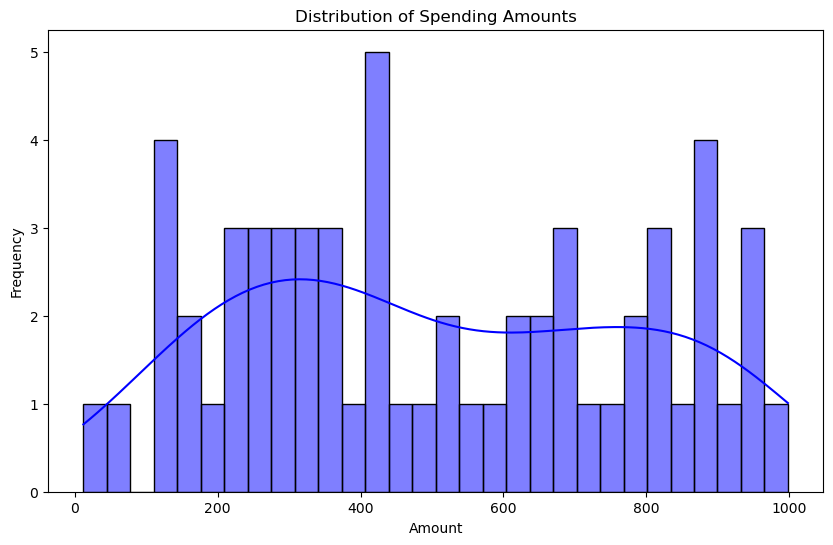

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(one_year_expense['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Spending Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


In [50]:
one_year_expense['Date'] = pd.to_datetime(one_year_expense['Date'])

In [51]:
one_year_expense['Year'] = one_year_expense['Date'].dt.year
one_year_expense['Month'] = one_year_expense['Date'].dt.month_name()

In [52]:
monthly_spending = one_year_expense.groupby('Month')['Amount'].sum().sort_values(ascending=False)

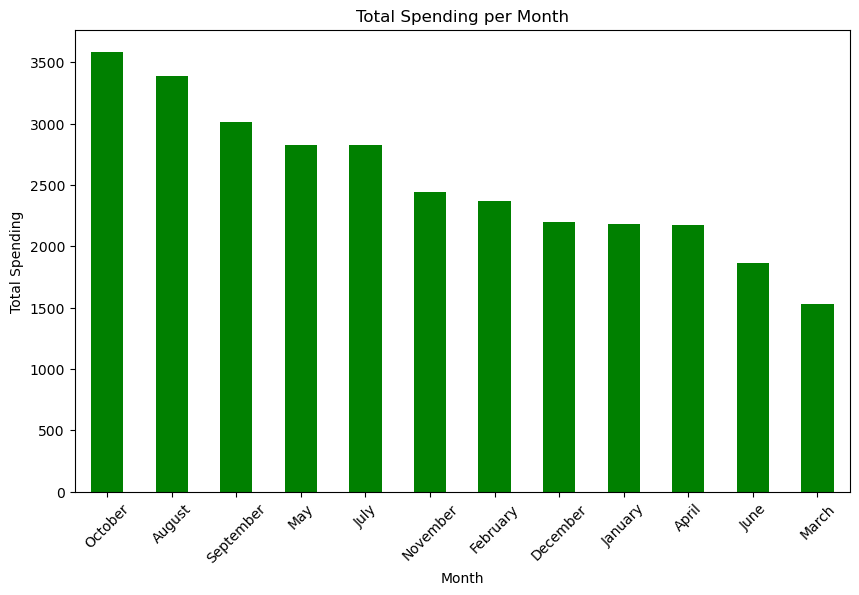

In [53]:
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='bar', color='green')
plt.title("Total Spending per Month")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

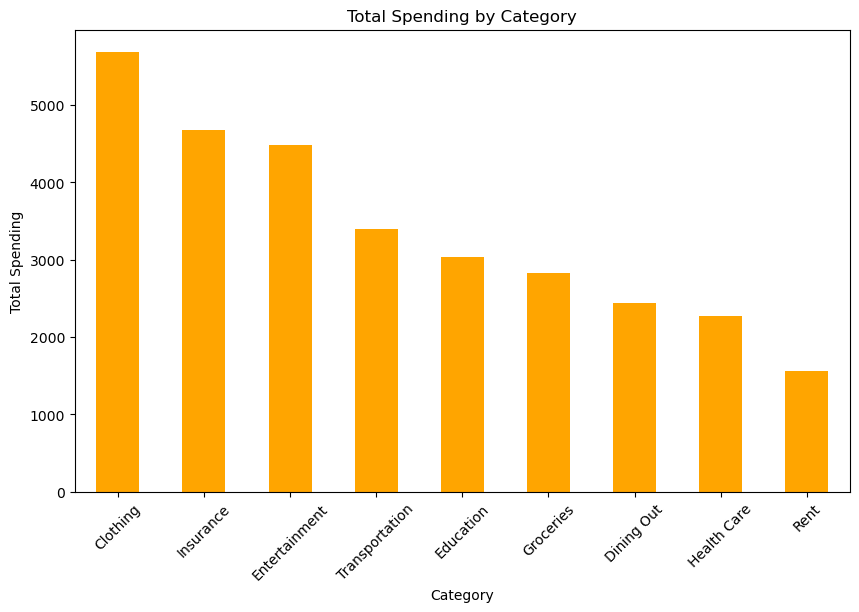

In [54]:
category_spending = one_year_expense.groupby('Categories')['Amount'].sum().sort_values(ascending=False)

# Plot spending per category
plt.figure(figsize=(10, 6))
category_spending.plot(kind='bar', color='orange')
plt.title("Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

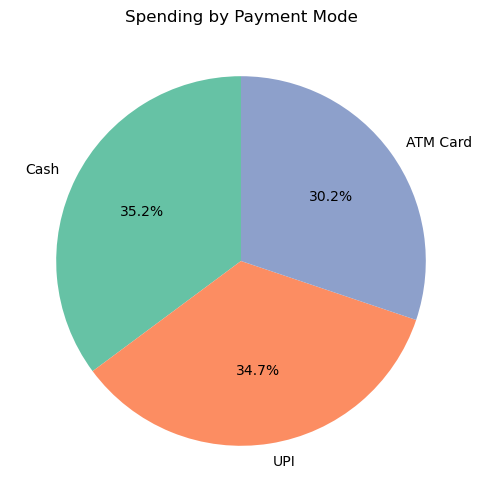

In [55]:
payment_mode_spending = one_year_expense.groupby('Payment_mode')['Amount'].sum().sort_values(ascending=False)

# Plot spending by payment mode
plt.figure(figsize=(8, 6))
payment_mode_spending.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Spending by Payment Mode")
plt.ylabel("")  # Hide y-label as it's a pie chart
plt.show()

In [56]:
categories_of_interest = one_year_expense[one_year_expense['Categories'].isin(['Transportation', 'Clothing'])]

In [57]:
category_monthly_spending = categories_of_interest.groupby(['Month', 'Categories'])['Amount'].sum().unstack()

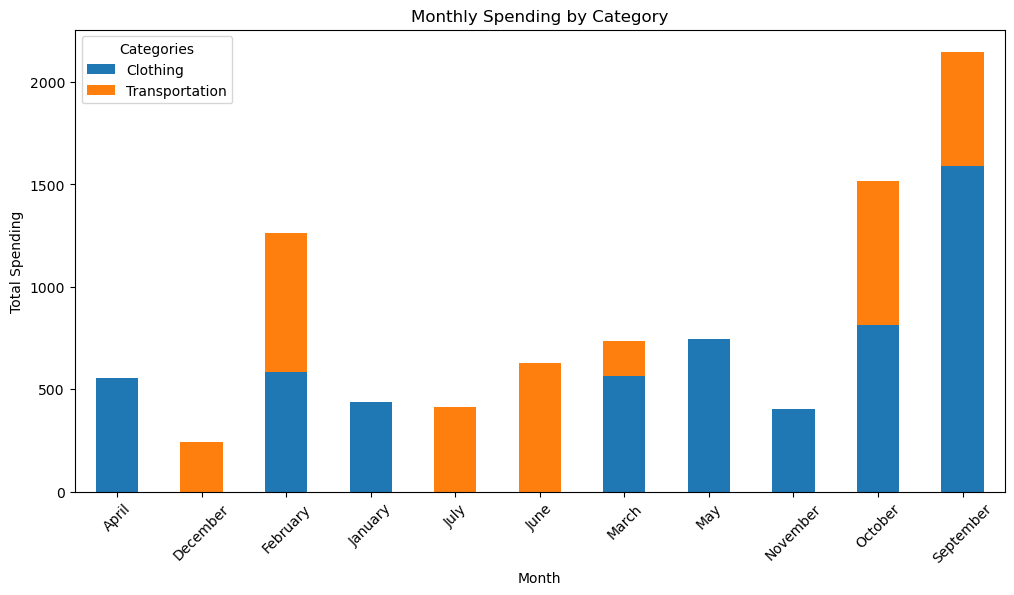

In [58]:
category_monthly_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title("Monthly Spending by Category")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

In [59]:
query = """
SELECT 
    Date, 
    Amount 
FROM monthly_expenses
WHERE Categories = 'Groceries'
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

In [60]:
# Create a DataFrame from the results
df_grocery = pd.DataFrame(results, columns=["Date", "Amount"])

In [61]:
# Convert 'Date' to datetime format for easier analysis
df_grocery['Date'] = pd.to_datetime(df_grocery['Date'])

In [62]:
#Add a column to identify the day of the week
df_grocery['Day_of_Week'] = df_grocery['Date'].dt.day_name()

In [63]:
# Add a column to identify the season (Winter: Dec-Feb, Spring: Mar-May, Summer: Jun-Aug, Fall: Sep-Nov)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_grocery['Season'] = df_grocery['Date'].dt.month.apply(get_season)

In [64]:
# Analyze weekend vs weekday spending
df_grocery['Is_Weekend'] = df_grocery['Day_of_Week'].isin(['Saturday', 'Sunday'])

In [65]:
# Calculate total spending on weekends vs weekdays
weekend_spending = df_grocery[df_grocery['Is_Weekend']].groupby('Day_of_Week')['Amount'].sum()
weekday_spending = df_grocery[~df_grocery['Is_Weekend']].groupby('Day_of_Week')['Amount'].sum()

In [66]:
# Display weekend vs weekday spending
print("Weekend Spending: ")
print(weekend_spending)
print("\nWeekday Spending: ")
print(weekday_spending)

Weekend Spending: 
Day_of_Week
Saturday    2172.03
Sunday      4198.52
Name: Amount, dtype: float64

Weekday Spending: 
Day_of_Week
Friday       2073.28
Monday       2345.88
Thursday      831.90
Tuesday      2083.55
Wednesday    2290.34
Name: Amount, dtype: float64


In [67]:
# Calculate total spending by season
seasonal_spending = df_grocery.groupby('Season')['Amount'].sum()

# Display seasonal spending
print("\nSeasonal Spending: ")
print(seasonal_spending)


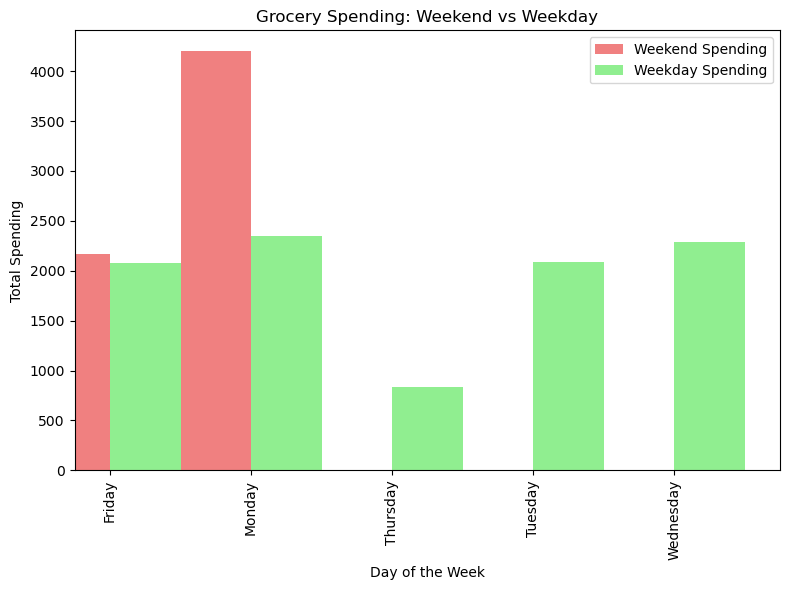

In [68]:
# Plot weekend vs weekday spending
plt.figure(figsize=(8, 6))
weekend_spending.plot(kind='bar', label='Weekend Spending', color='lightcoral', position=1)
weekday_spending.plot(kind='bar', label='Weekday Spending', color='lightgreen', position=0)
plt.xlabel('Day of the Week')
plt.ylabel('Total Spending')
plt.title('Grocery Spending: Weekend vs Weekday')
plt.legend()
plt.tight_layout()
plt.show()

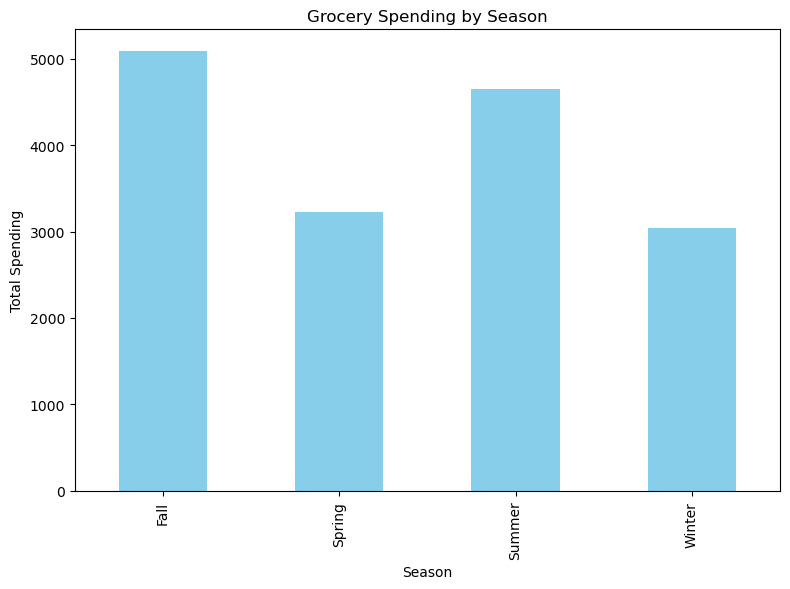

In [69]:
# Plot seasonal spending
plt.figure(figsize=(8, 6))
seasonal_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Total Spending')
plt.title('Grocery Spending by Season')
plt.tight_layout()
plt.show()

How has your overall spending changed over time (e.g., increasing, decreasing, remaining stable)?

In [70]:
# SQL Query to get total spending for each month
query = """
SELECT 
    strftime('%Y-%m', Date) AS Year_Month,  -- Extract year and month
    SUM(Amount) AS Total_Spent
FROM monthly_expenses
GROUP BY Year_Month
ORDER BY Year_Month;
"""

In [71]:
cursor.execute(query)
results = cursor.fetchall()

df_spending = pd.DataFrame(results, columns=["Year_Month", "Total_Spent"])
df_spending['Year_Month'] = pd.to_datetime(df_spending['Year_Month'])

In [72]:
# Print the DataFrame
print("Total Spending for Each Month:")
print(df_spending)

Total Spending for Each Month:
   Year_Month  Total_Spent
0  2025-01-01     13611.53
1  2025-02-01     12110.17
2  2025-03-01     13254.79
3  2025-04-01     13786.40
4  2025-05-01     11353.33
5  2025-06-01     13501.90
6  2025-07-01     14501.05
7  2025-08-01     11689.29
8  2025-09-01     11873.80
9  2025-10-01     12965.85
10 2025-11-01     12010.79
11 2025-12-01     14080.94


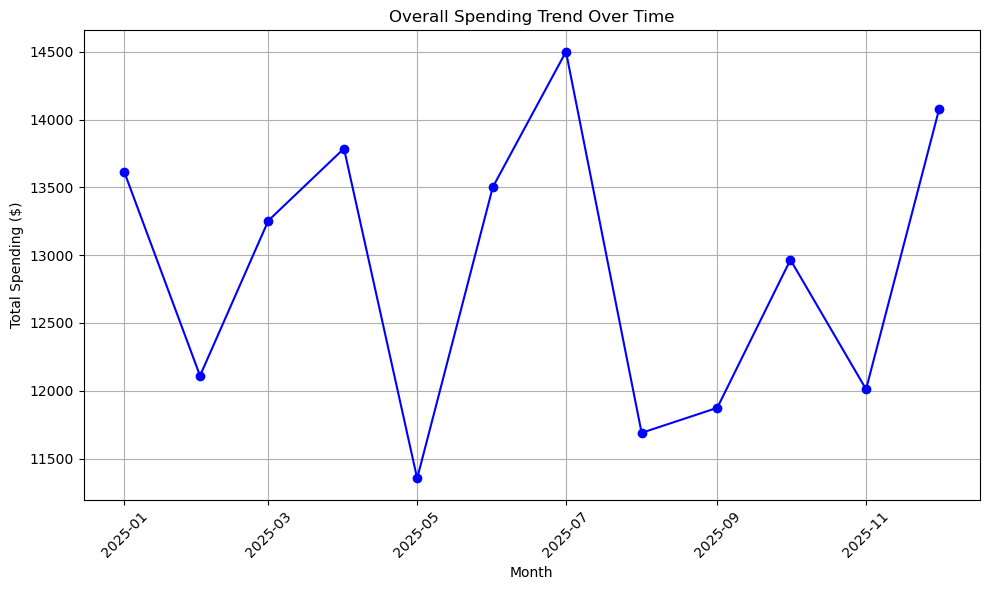

In [73]:
#Plotting the spending trend over time
plt.figure(figsize=(10, 6))
plt.plot(df_spending['Year_Month'], df_spending['Total_Spent'], marker='o', linestyle='-', color='b')

plt.title("Overall Spending Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Spending ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Define High and Low Priority Categories
high_priority_categories = ['Groceries', 'Health Care', 'Rent', 'Insurance', 'Education', 'Transportation']
low_priority_categories = ['Entertainment', 'Dining Out', 'Clothing', 'Travel', 'Gifts']

In [75]:
query = """
SELECT
    Categories,
    Amount
FROM monthly_expenses
"""


In [76]:
cursor.execute(query)
results = cursor.fetchall()

In [77]:
df_expenses = pd.DataFrame(results, columns=["Categories", "Amount"])

In [78]:
def categorize_priority(category):
    if category in high_priority_categories:
        return 'High Priority'
    elif category in low_priority_categories:
        return 'Low Priority'
    else:
        return 'Uncategorized'

In [79]:
df_expenses['Priority'] = df_expenses['Categories'].apply(categorize_priority)
priority_spending = df_expenses.groupby('Priority')['Amount'].sum().reset_index()

In [80]:
print("Total Spending by Priority Categories:")
print(priority_spending)

Total Spending by Priority Categories:
        Priority     Amount
0  High Priority  106714.64
1   Low Priority   48025.20


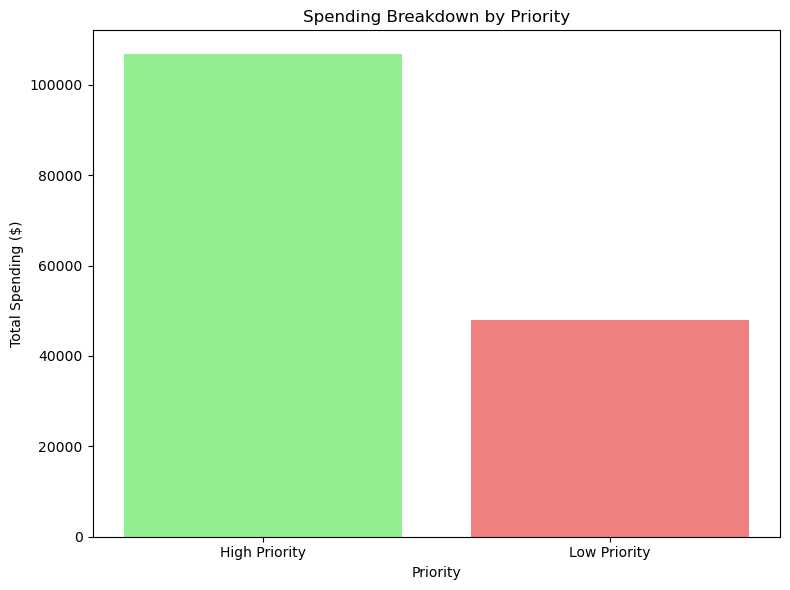

In [81]:
# Visualizing the spending breakdown by priority
plt.figure(figsize=(8, 6))
plt.bar(priority_spending['Priority'], priority_spending['Amount'], color=['lightgreen', 'lightcoral', 'lightblue'])
plt.xlabel('Priority')
plt.ylabel('Total Spending ($)')
plt.title('Spending Breakdown by Priority')
plt.tight_layout()

# Show the plot
plt.show()

Which category contributes the highest percentage of the total spending?


In [82]:
query = """
SELECT
    Categories,
    SUM(Amount) AS Total_Spent
FROM monthly_expenses
GROUP BY Categories
ORDER BY Total_Spent DESC
"""

In [83]:
cursor.execute(query)
results = cursor.fetchall()

In [84]:
df_expenses = pd.DataFrame(results, columns=["Categories", "Total_Spent"])

# Calculate total spending across all categories
total_spent_all_categories = df_expenses['Total_Spent'].sum()

# Calculate the percentage of total spending for each category
df_expenses['Percentage_of_Total_Spent'] = (df_expenses['Total_Spent'] / total_spent_all_categories) * 100

# Find the category with the highest percentage contribution
max_percentage_category = df_expenses.loc[df_expenses['Percentage_of_Total_Spent'].idxmax()]

In [85]:
print(f"The category that contributes the highest percentage of total spending is:")
print(f"Category: {max_percentage_category['Categories']}")
print(f"Percentage: {max_percentage_category['Percentage_of_Total_Spent']:.2f}%")
print(f"Total Spent in this Category: ${max_percentage_category['Total_Spent']:.2f}")

The category that contributes the highest percentage of total spending is:
Category: Education
Percentage: 15.97%
Total Spent in this Category: $24709.65


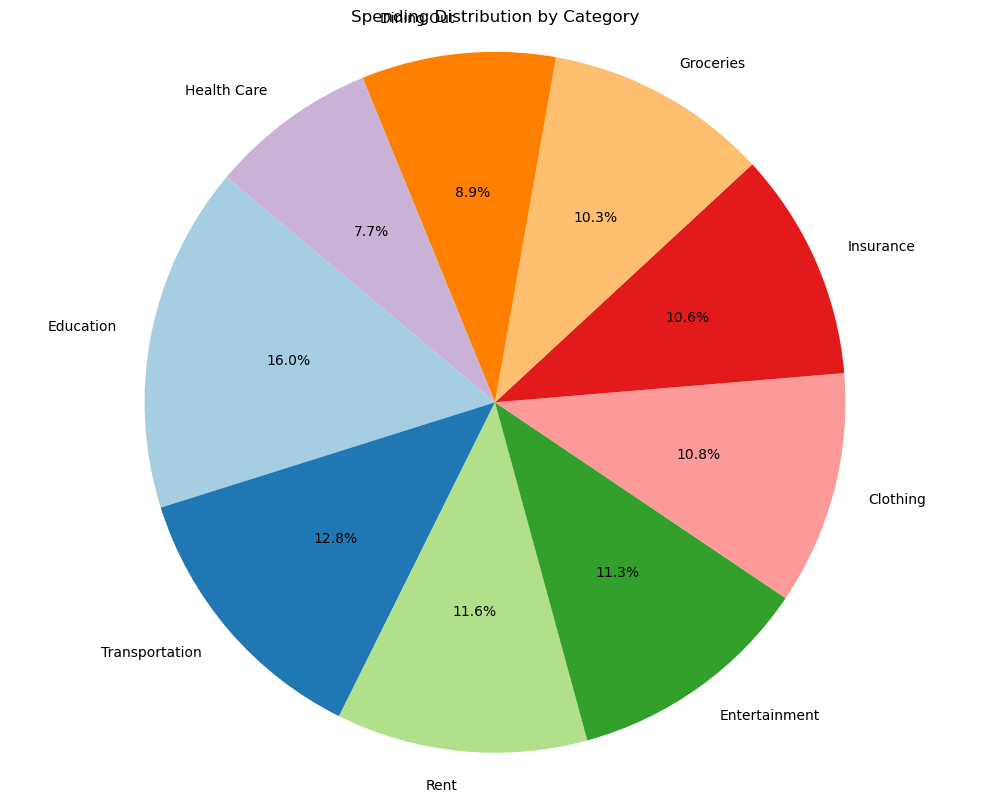

In [86]:
# Visualizing the spending distribution by category
plt.figure(figsize=(10, 8))
plt.pie(df_expenses['Percentage_of_Total_Spent'], labels=df_expenses['Categories'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Spending Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()


In [87]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
